![Alt Text](images/project_cover.png)


# Uncovering the Housing Market's Secrets: Multiple Linear Regression Analysis
## Jae Heon Kim

# Overview

This data science project uses multiple linear regression analysis techniques to build a reliable, statistically significant model for predicting housing prices in Kings County, Seattle. The data will contain home sale prices from May 2014 to May 2015, from King County's government records. The stakeholder is KCHA, Kings County Housing authority, a public agency that provides affordable housing options and services to low-income families, individuals, and seniors in King County. Their particular concern is providing homes for a family of five or more people. This project will help them to make data-driven well-informed decisions on making future services and polices.

# Business Problem

## Who is King County Housing Authority?
The KCHA is a public agency that provides affordable housing options and services to low-income families, individuals, and seniors in King County. They aim to help improve the quality of life for residents in the area by providing safe, decent, and affordable housing options, as well as supportive services and programs.

## What are their headaches?
- The metropolitan area has a severe shortage of affordable housing, and KCHA is working to address this issue, possibly due to the concentration of large corporate campuses in the Seattle area.
- However, the presence of these high-earning populations and corporate campuses makes it challenging to acquire new affordable housing units, requiring extreme precise mathematical precision.
- The housing market in Seattle is experiencing significant turbulence:
    - Housing prices have seen a sharp increase following the pandemic.
    - Rising interest rates are driving up mortgage rates.
    - The potential for an economic recession adds to the uncertain outlook of the housing market.
    - The presence of nearby tech campuses and potential for tech lay-offs further complicates the situation.
- KCHA asked to provide a housing price prediction model that can accomodate a family of any size.

## Why do they need this project?
- A multi-linear regression model can provide valuable insights into the factors that influence housing prices, helping KCHA make more informed decisions about acquiring new affordable housing units.
- The model can help KCHA understand the impact of changes in the housing market and make more accurate predictions about future trends, informing their strategic planning and decision-making.
- By providing valuable insights and predictions about the housing market, the model can help KCHA address the challenges they face in providing affordable housing in the metropolitan Seattle area.

# Data Understanding

## Import Packages

In [1]:
# Import basic packages
import numpy as np
import pandas as pd

# Import visualization pacakages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import math
import math

# Import scipy
from scipy import stats

# Import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot

# Import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Import warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Import miscellaneous packages
from IPython.display import Markdown

## Data 1:  Home Sales Prices of King County in 2021 and 2022

This data was gathered from King County's official government website https://kingcounty.gov/. This is our primary dataset and it contains detailed information about features of the houses sold.

In [2]:
# Read data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


# Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

The `address`, `lat`, and `long` fields have been retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). In some cases due to missing or incorrectly-entered data from the King County Assessor, this API returned locations outside of King County, WA. If you plan to use the `address`, `lat`, or `long` fields in your modeling, consider identifying outliers prior to including the values in your model.

## Data 2: Reported Incidents in King County up to 2019
This data was gathered from King County's official government website https://kingcounty.gov/. This is our supporting dataset and it contains detailed information about reported incidents in King County all the way to 2019. This information can be useful in creating new columns that tell how many incidents occurred in different regions.

In [3]:
# Read Data
df_incident = pd.read_csv('data/KCSO_Incident_Dataset__Historic_to_2019.csv')
df_incident.head()

,case_number,incident_datetime,incident_type,FCR,address_1,city,state,zip,created_at,updated_at,hour_of_day,day_of_week,Incident Block Location
0,C19046940,12/09/2019 09:02:00 AM,Other,503,1 Block AVE & YESLER WAY,SEATTLE,WA,98104,12/12/2019 06:19:00 PM,12/12/2019 08:07:00 PM,9,Monday,NaN
1,C19046039,12/02/2019 06:01:00 PM,Other,162,19700 Block 635TH PL NE,BARING,WA,98224,12/05/2019 05:15:00 PM,12/05/2019 07:06:00 PM,18,Monday,NaN
2,C19026684,07/14/2019 01:29:00 AM,Vehicle Recovery,311,1 Block PL S & DES MOINES MEMORIAL DR S,BURIEN,WA,98168,07/15/2019 05:45:00 AM,07/15/2019 06:09:00 PM,1,Sunday,NaN
3,C19043968,11/16/2019 10:07:00 PM,Traffic,404,RAINIER AVE N & RENTON AVE S,SKYWAY,WA,98178,11/19/2019 04:30:00 PM,11/19/2019 06:16:00 PM,22,Saturday,NaN
4,C19042199,11/04/2019 07:18:00 AM,Property Crime,313,1 Block PL S & DES MOINES MEMORIAL DR S,BURIEN,WA,98168,11/05/2019 04:35:00 PM,11/05/2019 06:26:00 PM,7,Monday,NaN


## Data 3: Reported Offenses in King County from 2020
This data was gathered from King County's official government website https://kingcounty.gov/. This is our supporting dataset and it contains detailed information about reported offenses in King County since 2020. This information can be useful in creating new columns that tell how many offenses occurred in different regions.

In [4]:
# Read data
df_offense = pd.read_csv("data/KCSO_Offense_Reports__2020_to_Present.csv")
df_offense.head()

,case_number,incident_datetime,nibrs_code,nibrs_code_name,block_address,city,state,zip,reporting_area,district,precinct,created_at,updated_at,hour_of_day,day_of_week,ID
0,C21034525,10/29/2021 11:21:00 AM,120,Robbery,14900 Block 4TH AVE SW,BURIEN,WA,98166,Reporting Area N05051,District N5,4.0,10/29/2021 03:04:35 PM,10/29/2021 03:39:50 PM,11,6,29495462116
1,C21034462,10/28/2021 08:10:00 PM,290,Destruction/Damage/Vandalism of Property,17600 Block 152ND PL SE,RENTON,WA,98058,Reporting Area F05007,District F5,3.0,10/29/2021 02:49:33 PM,10/29/2021 02:50:04 PM,20,5,29495152983
2,C21034548,10/29/2021 12:30:00 AM,240,Motor Vehicle Theft,100 Block SW 112TH ST,SEATTLE,WA,98146,Reporting Area K01012,District K1,4.0,10/29/2021 05:09:55 PM,10/29/2021 05:11:18 PM,0,6,29497952486
3,C21034576,10/28/2021 05:00:00 PM,13B,Simple Assault,14400 Block 162ND AVE SE,RENTON,WA,98059,Reporting Area F02003,District F2,3.0,10/29/2021 07:00:11 PM,10/29/2021 07:05:25 PM,17,5,29500173040
4,C22012227,04/12/2022 08:36:00 PM,13B,Simple Assault,2800 Block NE 200TH ST,SHORELINE,WA,98155,Reporting Area A05004,District A5,5.0,04/13/2022 06:35:07 AM,04/13/2022 06:36:30 AM,20,3,32749306796


## Data 4:  Population, City, County by Zipcode
This data was gathered from King County's official government website https://kingcounty.gov/. This is our supporting dataset and it contains a conversion table for zipcode, population and city.

In [5]:
# Read data
df_county = pd.read_csv("data/kc_zipcode.csv")
df_county.head()

,zip,population,city,county
0,99301,81583,Pasco,Franklin
1,98052,71940,Redmond,King
2,98012,70009,Bothell,Snohomish
3,98682,63768,Vancouver,Clark
4,98208,58211,Everett,Snohomish


We will extract zipcode from 'address' attribute of 'df' and make conversion by accessing 'df_county'.

In [6]:
# Change attribute's name, and dtype.
df_county['zipcode'] = df_county['zip']
df_county['zipcode'] = df_county['zipcode'].astype(str)
df_county = df_county[['population', 'city', 'county', 'zipcode']]
df_county.head()

,population,city,county,zipcode
0,81583,Pasco,Franklin,99301
1,71940,Redmond,King,98052
2,70009,Bothell,Snohomish,98012
3,63768,Vancouver,Clark,98682
4,58211,Everett,Snohomish,98208


# Data Preparation

In this step, we will explore data and clean them so they are ready for multi-regressional analysis.

## Dealing with Missing Values
We will thoroughly survey each column for missing values, and fill them after analyzing each attribute's distribution.

In [7]:
# Display all missing values.
display(df.info(), df.isna().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

None

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
greenbelt        False
nuisance         False
view             False
condition        False
grade            False
heat_source       True
sewer_system      True
sqft_above       False
sqft_basement    False
sqft_garage      False
sqft_patio       False
yr_built         False
yr_renovated     False
address          False
lat              False
long             False
dtype: bool

In [8]:
# Study the nature of the attribute 'heat_source'
display(df.heat_source.unique(), df.heat_source.value_counts(), df.heat_source.isna().sum())

array(['Gas', 'Oil', 'Electricity', 'Gas/Solar', 'Electricity/Solar',
       'Other', nan, 'Oil/Solar'], dtype=object)

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

32

The distribution is extremely unimodal so it will be filled with the mode.

In [9]:
# Fill missing values
df['heat_source'] = df['heat_source'].fillna('Gas')

In [10]:
# Study distribution of 'sewer_system'
display(df.sewer_system.unique(), df.sewer_system.value_counts(), df.sewer_system.isna().sum())

array(['PUBLIC', 'PRIVATE', 'PRIVATE RESTRICTED', nan,
       'PUBLIC RESTRICTED'], dtype=object)

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

14

This is an even more extreme unimodal distribution. Fill-in with 'PUBLIC'.

In [11]:
# Fill-in missing values
df['sewer_system'] = df['sewer_system'].fillna('PUBLIC')

## Dropping Outliers

Since we are predicting on 'price', we will study deeper into its distribution and check for potential outliers that are better removed.

1st percentile:      200000.0
2nd percentile:      308264.0
3rd percentile:      370000.0
4th percentile:      400000.0
5th percentile:      425000.0 

average:             1108536.0
median:              860000.0
maximum:             30750000.0
std. dev.:           896386.0 

95th percentile:     2500000.0
96th percentile:     2700000.0
97th percentile:     2976900.0
98th percentile:     3450000.0
99th percentile:     4300000.0
99.5th percentile:   5658970.0


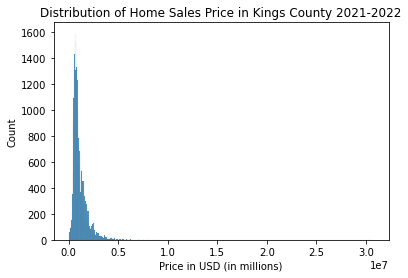

In [12]:
print('1st percentile:     ', round(df.price.quantile(0.01)))
print('2nd percentile:     ', round(df.price.quantile(0.02)))
print('3rd percentile:     ', round(df.price.quantile(0.03)))
print('4th percentile:     ', round(df.price.quantile(0.04)))
print('5th percentile:     ', round(df.price.quantile(0.05)), '\n')
print('average:            ', round(df.price.mean()))
print('median:             ', round(df.price.median()))
print('maximum:            ', round(df.price.max()))
print('std. dev.:          ', round(df.price.std()), '\n')
print('95th percentile:    ', round(df.price.quantile(0.95)))
print('96th percentile:    ', round(df.price.quantile(0.96)))
print('97th percentile:    ', round(df.price.quantile(0.97)))
print('98th percentile:    ', round(df.price.quantile(0.98)))
print('99th percentile:    ', round(df.price.quantile(0.99)))
print('99.5th percentile:  ', round(df.price.quantile(0.995)))

sns.histplot(df.price)
plt.title("Distribution of Home Sales Price in Kings County 2021-2022")
plt.xlabel("Price in USD (in millions)")
plt.show()

The distribution of the data is right-skewed, but it follows a normal distribution if the extreme values are removed. The presence of these extreme values is greatly distorting the distribution of the data, so we will remove them. The upper outliers are far more extreme than the lower outliers, so we will exclude them from the analysis by setting a threshold at the 99th percentile. The lower outliers are also meaningless for our study since they represent the cheapest homes that only hold minimal value for property contractors. The prices of these homes reflect the value of the lot rather than the value of the property itself. Therefore, we will exclude the lower outliers from our analysis as well at a threshold of 2nd percentile.

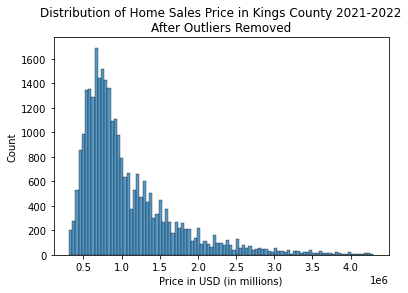

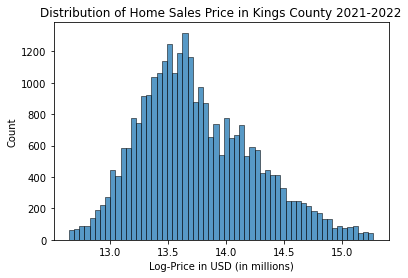

In [13]:
# Remove outliers
df = df.loc[(df['price'] < df['price'].quantile(0.99)) &
            (df['price'] > df['price'].quantile(0.02))]

# Show distribution of price after removing outliers
sns.histplot(df.price)
plt.title("Distribution of Home Sales Price in Kings County 2021-2022\nAfter Outliers Removed")
plt.xlabel("Price in USD (in millions)")
plt.show()

# Check distribution of price after log-transformation for reference.
df['log_price'] = np.log(df['price'])
sns.histplot(df.log_price)
plt.title("Distribution of Home Sales Price in Kings County 2021-2022")
plt.xlabel("Log-Price in USD (in millions)")
plt.show()
df.drop('log_price', axis=1, inplace=True)

We have flattened the distribution into a more normal looking shape. The log-transformation histogram show us we can employ this transformation in the future.

## Creating New Column 1: zipcode, city, population, county
We will create new columns that can be meaningfully interpreted.

In [14]:
# See address attribute
display(df.address.head(), df.address[0])

0    2102 Southeast 21st Court, Renton, Washington ...
1    11231 Greenwood Avenue North, Seattle, Washing...
2    8504 South 113th Street, Seattle, Washington 9...
3    4079 Letitia Avenue South, Seattle, Washington...
4    2193 Northwest Talus Drive, Issaquah, Washingt...
Name: address, dtype: object

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

It's in string format so we will extract this and create a new attribute 'zipcode' to hold the value.

In [15]:
# Extract zipcodes and and create a new column to store them
df['last_25'] = df['address'].str[-20:]
df['zipcode'] = df['last_25'].str.extract(r'([0-9]{5})')
df.drop('last_25', axis=1, inplace=True)
df['zipcode'] = df['address'].str[-20:-15]
df['zipcode'].unique()

array(['98055', '98133', '98178', '98118', '98027', '98166', '98030',
       '98023', '98019', '98144', '98031', '68106', '98092', '98103',
       '98006', '98136', '98007', '98038', '98057', '98077', '98126',
       '98053', '98107', '98008', '98155', '98168', '98199', '98004',
       '98045', '98052', '98011', '98002', '98033', '98116', '08360',
       '98198', '98125', '98001', '62859', '98112', '98034', '98059',
       '98005', '98040', '98014', '98106', '98029', '98122', '98003',
       '98117', '98042', '98119', '98065', '98022', '98072', '98039',
       '98058', '98056', '98108', '98115', '98074', '98105', '98024',
       '07087', '98146', '11704', '68123', '98102', '52405', '02066',
       '80501', '91343', '19131', '98028', '98188', '55417', '98177',
       '98075', '98010', '98148', '53158', '98047', '15120', '98109',
       '98032', '97210', '98070', '11105', '91730', '68410', '58490',
       '68048', '62703', '68601', '61108', '96816', '47060', '98288',
       '48503', '559

In [16]:
# Merge dataframes so that 'df' now has added column values for df_county.columns
df = pd.merge(df, df_county, on='zipcode')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode,population,city,county
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,24077,Renton,King
1,3340401570,3/2/2022,750000.0,3,2.0,1830,7969,1.0,NO,NO,...,90,1950,2008,"306 South 15th Street, Renton, Washington 9805...",47.466730,-122.21400,98055,24077,Renton,King
2,7399301200,3/29/2022,728000.0,4,2.0,2170,7520,1.0,NO,NO,...,60,1973,0,"1814 Aberdeen Avenue Southeast, Renton, Washin...",47.463930,-122.18974,98055,24077,Renton,King
3,9899200050,3/24/2022,565000.0,4,2.0,1400,10364,1.5,NO,NO,...,330,1971,0,"3426 Shattuck Avenue South, Renton, Washington...",47.448450,-122.21243,98055,24077,Renton,King
4,6673070070,12/28/2021,645000.0,3,2.0,1520,8250,1.0,NO,NO,...,200,1981,0,"2209 Southeast 21st Street, Renton, Washington...",47.460870,-122.18869,98055,24077,Renton,King


In [17]:
# Check values for attribute 'county'
display(df.county.value_counts(), df.county.isna().sum(), len(df))

King         27695
Pierce          28
Snohomish       20
Spokane          3
Clark            2
Asotin           1
Name: county, dtype: int64

0

27749

In [18]:
# Drop all data points outside King County
df = df.loc[df['county'] == 'King']
display(df.head(), len(df))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode,population,city,county
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,24077,Renton,King
1,3340401570,3/2/2022,750000.0,3,2.0,1830,7969,1.0,NO,NO,...,90,1950,2008,"306 South 15th Street, Renton, Washington 9805...",47.466730,-122.21400,98055,24077,Renton,King
2,7399301200,3/29/2022,728000.0,4,2.0,2170,7520,1.0,NO,NO,...,60,1973,0,"1814 Aberdeen Avenue Southeast, Renton, Washin...",47.463930,-122.18974,98055,24077,Renton,King
3,9899200050,3/24/2022,565000.0,4,2.0,1400,10364,1.5,NO,NO,...,330,1971,0,"3426 Shattuck Avenue South, Renton, Washington...",47.448450,-122.21243,98055,24077,Renton,King
4,6673070070,12/28/2021,645000.0,3,2.0,1520,8250,1.0,NO,NO,...,200,1981,0,"2209 Southeast 21st Street, Renton, Washington...",47.460870,-122.18869,98055,24077,Renton,King


27695

## New Column 2: zip_incident
We will create a new column 'zip_incident' that displays number of reported incidents in a certain zipcode.

In [19]:
# Create 'zip_incident'
df_incident['zipcode'] = df_incident['zip']
df_incident.drop('zip', axis=1, inplace=True)

dict_incident = dict(df_incident.zipcode.value_counts())

df['zip_incident'] = df['zipcode'].apply(lambda x: dict_incident[x] if x in dict_incident else 0)

## New Column 3: zip_offense
We will create a new column 'zip_offense' that displays number of reported offenses in a certain zipcode.

In [20]:
# Create 'zip_offense'
df_offense['zipcode'] = df_offense['zip']
df_offense.drop('zip', axis=1, inplace=True)

dict_offense = dict(df_offense.zipcode.value_counts())

df['zip_offense'] = df['zipcode'].apply(lambda x: dict_offense[x] if x in dict_offense else 0)

## New Colum 4: age
We will create a new column 'age' that displays the house age at the time of the sale.

In [21]:
# Change date's dtype to datetime, keep only the year, then change to integer value.
df['date'] = pd.to_datetime(df['date']).dt.year
df.date = df.date.astype(int)

# Compute age of the house
df['age'] = df['date'] - df['yr_built']

# For any negative value, change the year to 0
df.loc[df['age'] < 0, 'age'] = 0

Negative values of 1 are not dropped because they were homes built in 2022.

## New Colum 5: min_dist
We will create a new column that tracks the minimum distance to important headquarters in King County.

In [22]:
def haversine(lat, long):
    # Latitude and longitude coordinates of the headquarters
    amazon = (47.6062, -122.3321)
    microsoft = (47.6395, -122.1282)
    starbucks = (47.5906, -122.3331)
    boeing = (47.5301, -122.0326)
    costco = (47.8107, -122.3774)
    
    
    # List of coordinates of the headquarters
    coordinates = [amazon, microsoft, starbucks, boeing, costco]
    
    R = 6371  # radius of the earth in kilometers
    distances = []
    
    # Compute distances to all headquarters
    for c in coordinates:
        dlat = math.radians(c[0] - lat)
        dlon = math.radians(c[1] - long)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat)) \
            * math.cos(math.radians(c[0])) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        distance = R * c
        distances.append(distance)
    
    # Return the minimum distance
    return min(distances)

df['min_dist'] = df.apply(lambda row: haversine(row['lat'], row['long']), axis=1)

Before moving on, check for missing values again after data cleaning.

In [23]:
df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
greenbelt        False
nuisance         False
view             False
condition        False
grade            False
heat_source      False
sewer_system     False
sqft_above       False
sqft_basement    False
sqft_garage      False
sqft_patio       False
yr_built         False
yr_renovated     False
address          False
lat              False
long             False
zipcode          False
population       False
city             False
county           False
zip_incident     False
zip_offense      False
age              False
min_dist         False
dtype: bool

We are ready to create the baseline model. Before doing that, we will create pairplots and correlation heatmaps to gain insights for future modeling.

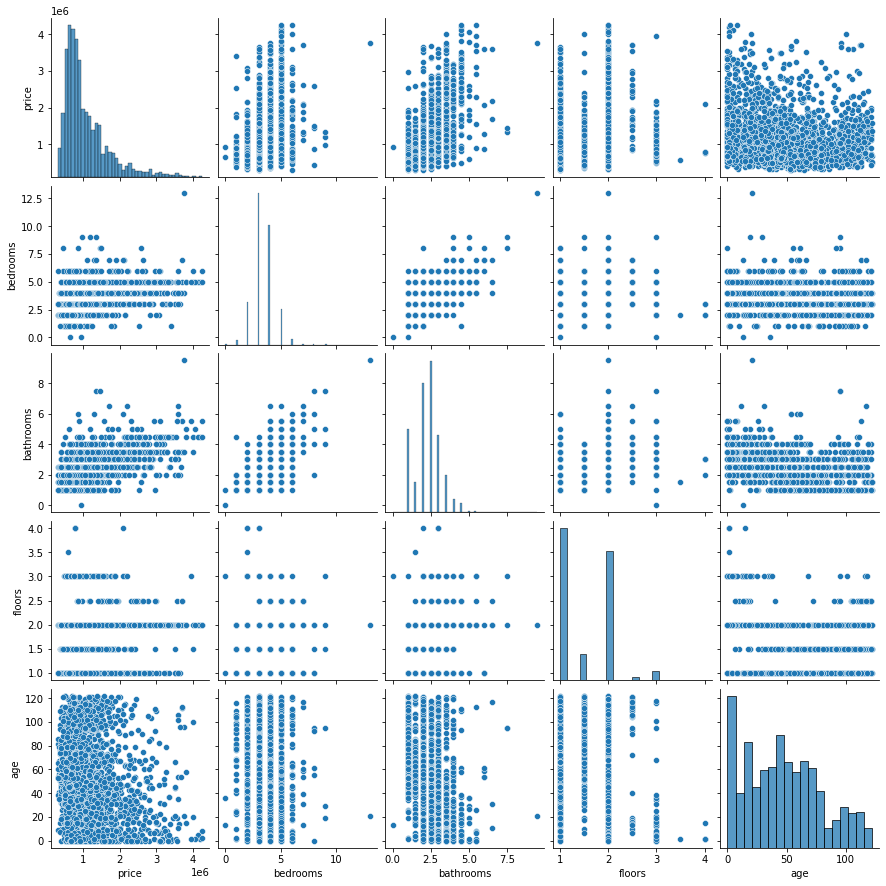

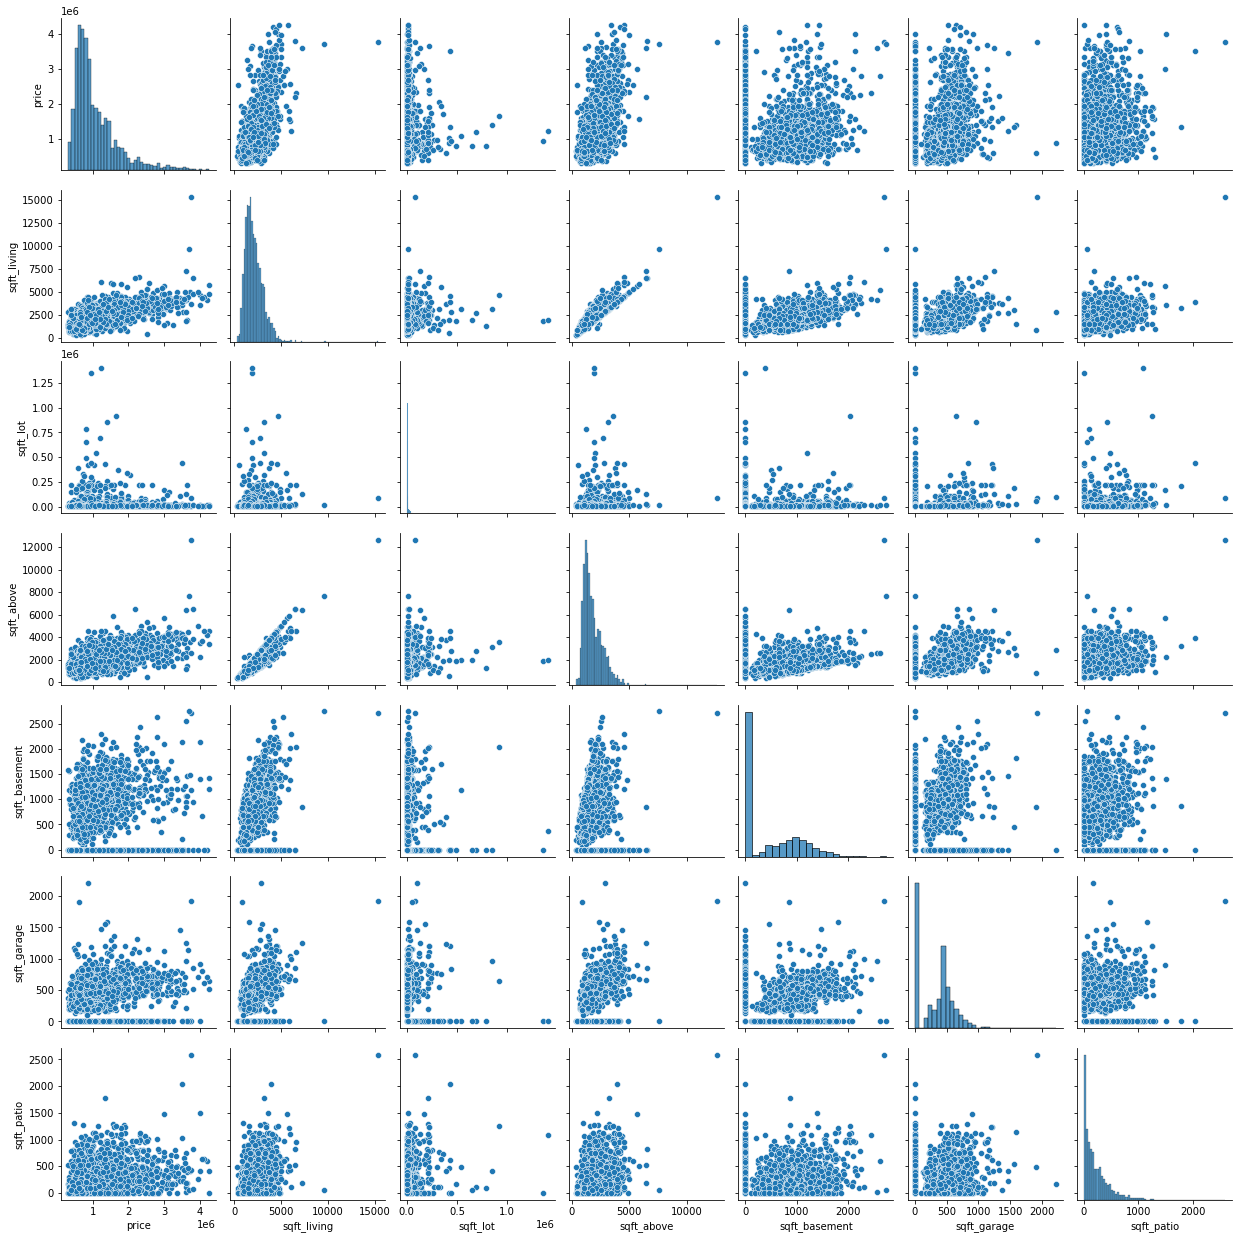

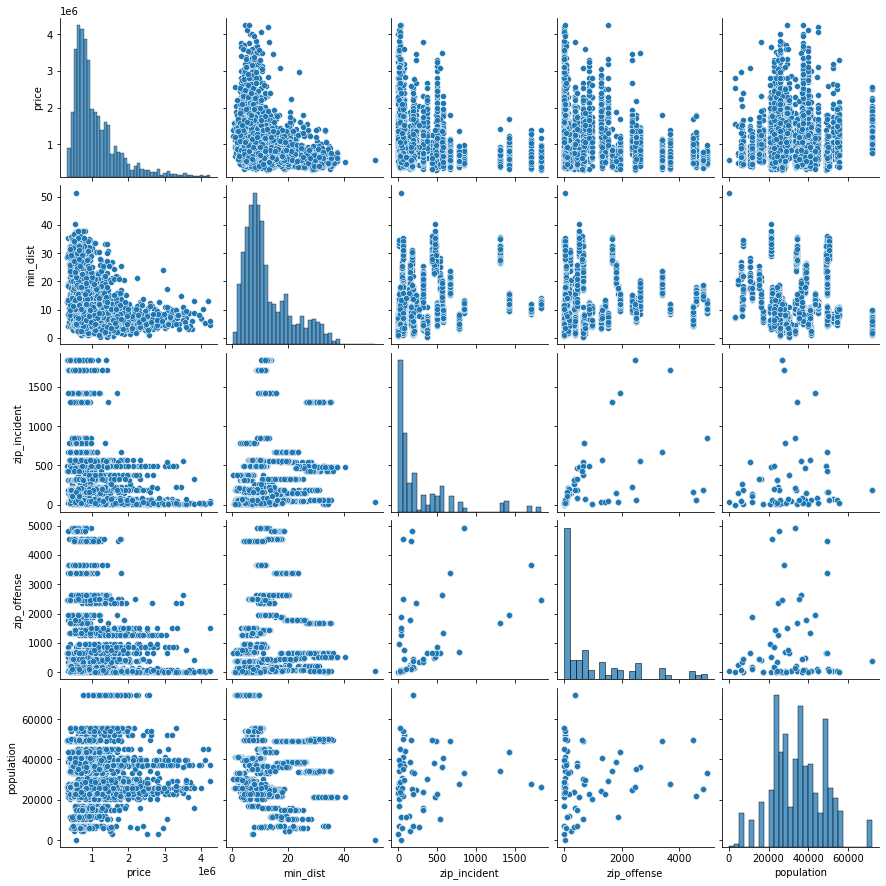

In [24]:
sample_df = df.sample(n=3000, random_state=817)

pairplot_columns1 = ['price', 'bedrooms', 'bathrooms', 'floors', 'age']
pairplot_columns2 = ['price', 'sqft_living', 'sqft_lot', 'sqft_above',
                     'sqft_basement', 'sqft_garage', 'sqft_patio']
pairplot_columns3 = ['price', 'min_dist', 'zip_incident', 'zip_offense', 'population']


sns.pairplot(sample_df[pairplot_columns1])
plt.show()

sns.pairplot(sample_df[pairplot_columns2])
plt.show()

sns.pairplot(sample_df[pairplot_columns3])
plt.show()

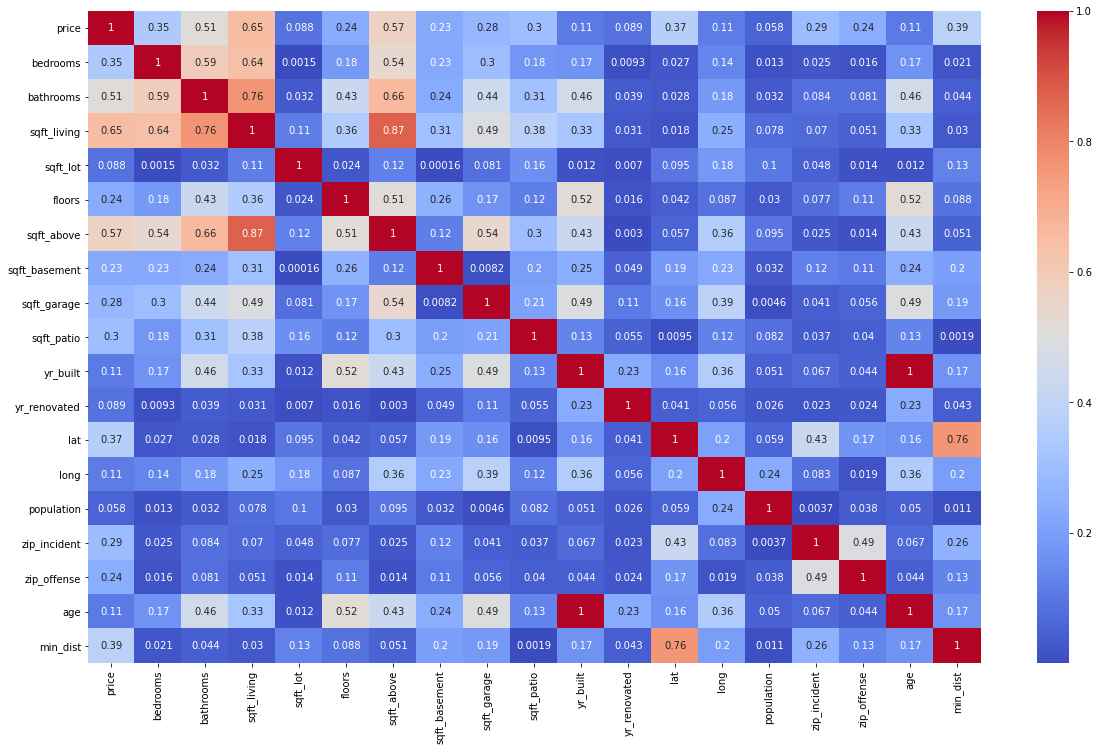

In [25]:
corr = abs(df.drop(['id', 'date'], axis=1).corr())
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Pre-work for Ordinal Values
We will use OrdinalEncoder() later when creating multi-linear regression model.

In [26]:
# Divide predictor columns to three groups based on their features
numeric_columns = ['bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot', 
                   'sqft_basement', 'sqft_garage', 'sqft_patio', 'zip_incident', 
                   'zip_offense', 'age', 'min_dist']
ordinal_columns = ['condition', 'grade', 'view']
nominal_columns = ['waterfront', 'greenbelt', 'nuisance', 'heat_source', 
                   'sewer_system','zipcode', 'city']

Let's clean ordinal columns so that they are ready for ordinal encoding.

In [27]:
# Display information about ordinal columns
display(df[ordinal_columns].info(), df[ordinal_columns].isna().any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27695 entries, 0 to 27738
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   condition  27695 non-null  object
 1   grade      27695 non-null  object
 2   view       27695 non-null  object
dtypes: object(3)
memory usage: 865.5+ KB


None

condition    False
grade        False
view         False
dtype: bool

There are no missing values to fill. We will now change ordinal columns' category to dtype category and then assign the order of magnitude to each category.

In [28]:
# Change data type
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['view'] = df['view'].astype('category')

# Display ordinal columns so that order can be arranged
display(df.condition, df.grade, df.view)

0             Good
1          Average
2          Average
3             Good
4          Average
           ...    
27690      Average
27691      Average
27725    Very Good
27726    Very Good
27738      Average
Name: condition, Length: 27695, dtype: category
Categories (5, object): ['Average', 'Fair', 'Good', 'Poor', 'Very Good']

0            7 Average
1            7 Average
2            7 Average
3        6 Low Average
4               8 Good
             ...      
27690        7 Average
27691           8 Good
27725         9 Better
27726    6 Low Average
27738    6 Low Average
Name: grade, Length: 27695, dtype: category
Categories (13, object): ['1 Cabin', '10 Very Good', '11 Excellent', '12 Luxury', ..., '6 Low Average', '7 Average', '8 Good', '9 Better']

0             NONE
1             NONE
2             NONE
3             NONE
4             NONE
           ...    
27690         NONE
27691    EXCELLENT
27725         GOOD
27726         NONE
27738         NONE
Name: view, Length: 27695, dtype: category
Categories (5, object): ['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE']

In [29]:
# Assign the order for each category
df['condition'] = df['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average', 'Good', 'Very Good'])
df['grade'] = df['grade'].cat.reorder_categories(['1 Cabin', '2 Substandard', '3 Poor', '4 Low',
                                                  '5 Fair', '6 Low Average', '7 Average', '8 Good',
                                                  '9 Better', '10 Very Good', '11 Excellent', '12 Luxury',
                                                  '13 Mansion'])
df['view'] = df['view'].cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])

In [30]:
# Assign the order for each category to a corresponding list for future ordinal encoding
condition_list = df.condition.cat.categories.tolist()
grade_list = df.grade.cat.categories.tolist()
view_list = df.view.cat.categories.tolist()

## Pre-work for Nominal Values
Now that pre-work for ordinal encoding is done, we will do the same for nominal encoding.

In [31]:
# Change data type for nominal categorical data
df['zipcode'] = df['zipcode'].astype('category')
df['city'] = df['city'].astype('category')

# Evaluation/Modeling
We will now start making multi-linear regression models for price prediction. We will explore different possibilities and finish by choosing the best model.

In [32]:
# Create a list 'results' that store r-squared and rmse of different regression models.
results = []

## Baseline: Most Correlated Varaibles
Based on the correlation heatmap, two most correlated variables to the price are 'sqft_living' and 'sqft_above'. We will start our regression models with a baseline model that uses these two as predictor variables for the target variable 'price'.

In [33]:
# Define Predictor variable X and target variable y
X = df[['sqft_living', 'sqft_above']]
y = df['price']

In [34]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# Fit / Transform the numeric data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                             columns=X_train.columns,
                             index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

X_train_final = X_train_scaled
X_test_final = X_test_scaled

In [36]:
# Fit the model, predict, evaluate
baseline = LinearRegression()
baseline.fit(X_train_final, y_train)
y_hat = baseline.predict(X_test_final)
residual = y_test-y_hat

r2 = metrics.r2_score(y_test, y_hat)
rmse = metrics.mean_squared_error(y_test, y_hat, squared=False)
result_baseline = [r2, rmse]
results.append(result_baseline)

print('R^2:  ', r2)
print('RMSE: ', rmse)

R^2:   0.42557063181769383
RMSE:  476488.2144957241


RMSE is still high, and only 42% of the variation in target variable is explained by our model. We will work to increase these numbers.

## First Model: Newly Created Variables
We will only put newly created variables into the first model, to see their impacts only on the target variable.

In [37]:
# Define predictor variable and target variable
X = df[['zip_incident', 'zip_offense', 'age', 'min_dist']]
y = df['price']

In [38]:
# Tran test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
# Fit / transform numeric data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                             columns=X_train.columns,
                             index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

X_train_final = X_train_scaled
X_test_final = X_test_scaled

In [40]:
# Fit / predict / evaluate
model_1 = LinearRegression()
model_1.fit(X_train_final, y_train)
y_hat = model_1.predict(X_test_final)
residual = y_test-y_hat

r2 = metrics.r2_score(y_test, y_hat)
rmse = metrics.mean_squared_error(y_test, y_hat, squared=False)
result_model_1 = [r2, rmse]
results.append(result_model_1)

print('R^2:  ', r2)
print('RMSE: ', rmse)

R^2:   0.23319379901140724
RMSE:  550524.5031316202


Their impacts are meaningful, but not strong enough by themselves.

## Second Model: All Numerical Variables
In this model we will include all numeric data to see the maximum level which it can predict the target variable with numeric predictors only.

In [41]:
# Define predictor variables and target variable
X = df[numeric_columns]
y = df['price']

In [42]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Fit / transform numeric data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

X_train_final = X_train_scaled
X_test_final = X_test_scaled

In [44]:
# Fit / predict /evaluate
model_2 = LinearRegression()
model_2.fit(X_train_final, y_train)
y_hat = model_2.predict(X_test_final)
residual = y_test-y_hat

r2 = metrics.r2_score(y_test, y_hat)
rmse = metrics.mean_squared_error(y_test, y_hat, squared=False)
result_model_2 = [r2, rmse]
results.append(result_model_2)

display(r2, rmse)

0.6161450190214732

389508.9451005957

Our studies have progressed much. Now let's introduce nominal varaibles and ordinal variables separately, and eventually add them all together.

# Third Model: Nominal Variables
In this model, we will try to predict target variable with the help of nominal variable only.

In [45]:
# For reference purpose only
numeric_columns = ['bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot', 
                   'sqft_basement', 'sqft_garage', 'sqft_patio', 'zip_incident', 
                   'zip_offense', 'age', 'min_dist']
ordinal_columns = ['condition', 'grade', 'view']
nominal_columns = ['waterfront', 'greenbelt', 'nuisance', 'heat_source', 'sewer_system']

In [46]:
# Define predictor variables and target variable
X = df[nominal_columns]
y = y

In [47]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Use OneHotEncoder
X_train_nominal = X_train[nominal_columns]
X_test_nominal = X_test[nominal_columns]

ohe = OneHotEncoder(sparse=False , handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train_nominal)
X_test_ohe = ohe.transform(X_test_nominal)

X_train_ohe  = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names())
X_test_ohe = pd.DataFrame(X_test_ohe, columns = ohe.get_feature_names())

X_train_final = X_train_ohe
X_test_final = X_test_ohe

In [49]:
# Fit and Predict
model_3 = LinearRegression()
model_3.fit(X_train_final, y_train)
y_hat = model_3.predict(X_test_final)
residual = y_test-y_hat

r2 = metrics.r2_score(y_test, y_hat)
rmse = metrics.mean_squared_error(y_test, y_hat, squared=False)
result_model_3 = [r2, rmse]
results.append(result_model_3)

print('R^2:  ', r2)
print('RMSE: ', rmse)

R^2:   0.046905004227658864
RMSE:  613764.7470465882


Nominal variables aren't as powerful as expected.

# Fourth Model: Ordinal Variables
Now we will evaluate the impact of ordinal predictor variables on the target variable.

In [50]:
# Define predictor variables and target variable
X = df[ordinal_columns]
y = df['price']

In [51]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# Process ordinal data
oe = OrdinalEncoder(categories = [condition_list, grade_list, view_list])

X_train_oe = oe.fit_transform(X_train)
X_test_oe = oe.transform(X_test)

X_train_oe = pd.DataFrame(X_train_oe, columns=X_train.columns)
X_test_oe = pd.DataFrame(X_test_oe, columns=X_test.columns)

X_train_final = X_train_oe
X_test_final = X_test_oe

In [53]:
# Fit / transform / predict
model_4 = LinearRegression()
model_4.fit(X_train_final, y_train)
y_hat = model_4.predict(X_test_final)
residual = y_test - y_hat

r2 = metrics.r2_score(y_test, y_hat)
rmse = metrics.mean_squared_error(y_test, y_hat, squared=False)
result_model_4 = [r2, rmse]
results.append(result_model_4)

print('R^2:  ', r2)
print('RMSE: ', rmse)

R^2:   0.42748099991875543
RMSE:  475695.23104822653


We have much stronger results with this model than we did with nominal data only.

## Fifth Model
This time we will use all columns of different data types together for the first time.

In [54]:
# List and organize all the predictor variables
numeric_columns = ['bedrooms', 'floors', 'sqft_living', 'sqft_lot', 
                   'sqft_basement', 'sqft_garage', 'sqft_patio', 'zip_incident', 
                   'zip_offense', 'age', 'min_dist']
ordinal_columns = ['condition', 'grade', 'view']
nominal_columns = ['waterfront', 'greenbelt', 'nuisance', 'heat_source', 
                   'sewer_system']

predictor_columns = numeric_columns + ordinal_columns + nominal_columns

In [55]:
# Define predictor variables and target variable
X = df[predictor_columns]
y = df['price']

In [56]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Process numerical data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train[numeric_columns])
X_test_scaled = ss.transform(X_test[numeric_columns])

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train[numeric_columns].columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test[numeric_columns].columns,
                             index=X_test.index)

In [58]:
# Process ordinal data
oe = OrdinalEncoder(categories = [condition_list, grade_list, view_list])

X_train_oe = oe.fit_transform(X_train[ordinal_columns])
X_test_oe = oe.transform(X_test[ordinal_columns])

X_train_oe = pd.DataFrame(X_train_oe, columns=X_train[ordinal_columns].columns)
X_test_oe = pd.DataFrame(X_test_oe, columns=X_test[ordinal_columns].columns)

In [59]:
# Process nominal data
ohe = OneHotEncoder(sparse=False , handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train[nominal_columns])
X_test_ohe = ohe.transform(X_test[nominal_columns])

X_train_ohe  = pd.DataFrame(X_train_ohe, columns = ohe.get_feature_names())
X_test_ohe = pd.DataFrame(X_test_ohe, columns = ohe.get_feature_names())


In [60]:
# Concatenate all the processed data
X_train_scaled.index = X_train.index
X_train_oe.index = X_train.index
X_train_ohe.index = X_train.index
X_train_final = pd.concat([X_train_scaled, X_train_oe, X_train_ohe], axis=1)

X_test_scaled.index = X_test.index
X_test_oe.index = X_test.index
X_test_ohe.index = X_test.index
X_test_final = pd.concat([X_test_scaled, X_test_oe, X_test_ohe], axis=1)


In [61]:
# Fit / Predict / Results
model_5 = LinearRegression()
model_5.fit(X_train_final, y_train)
y_hat = model_5.predict(X_test_final)
residual = y_test - y_hat

r2 = metrics.r2_score(y_test, y_hat)
rmse = metrics.mean_squared_error(y_test, y_hat, squared=False)
result_model_5= [r2, rmse]
results.append(result_model_5)

print('R^2:  ', r2)
print('RMSE: ', rmse)

R^2:   0.6553421256465599
RMSE:  369086.3195849872


We are happier with improved R^2 but we will go for higher by possible transformation or introduction of new variables.

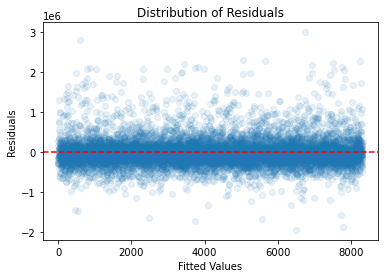

In [62]:
# Draw residual plot
fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=residual, alpha=0.1)
ax.axhline(y=0, color='red', linestyle='--')
plt.title("Distribution of Residuals")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

Consistent distribution of residuals is one of the assumptions of linear regression and it's clearly present with our fifth model.

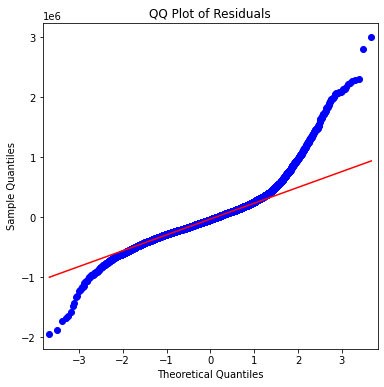

In [63]:
fig, ax = plt.subplots(figsize=(6, 6))
qqplot(np.array(residual), line='q', ax=ax)
plt.title('QQ Plot of Residuals')
plt.show()


The distribution of residuals isn't strictly normal. However, it's closer to normal shape than before.

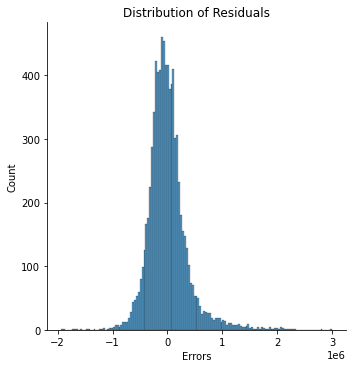

In [64]:
sns.displot(residual)
plt.title("Distribution of Residuals")
plt.xlabel("Errors")
plt.show()

# Sixth Model
In this model, we will log-transform the target variable, to see if this can result in a more accurate prediction model.

In [65]:
# Log-transform target variable
df['log_price'] = np.log(df['price'])

In [66]:
# Display variables of our interest
numeric_columns = ['bedrooms', 'floors', 'sqft_living', 'sqft_lot', 
                   'sqft_basement', 'sqft_patio', 'zip_incident', 'age', 'min_dist']
ordinal_columns = ['condition', 'grade', 'view']
nominal_columns = ['waterfront', 'greenbelt', 'nuisance', 'heat_source', 
                   'sewer_system']

predictor_columns = numeric_columns + ordinal_columns + nominal_columns

In [67]:
# Define predictor and target variables
X = df[predictor_columns]
y = df['log_price']

In [68]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Process numeric train
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train[numeric_columns])
X_test_scaled = ss.transform(X_test[numeric_columns])

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train[numeric_columns].columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test[numeric_columns].columns,
                             index=X_test.index)

In [70]:
# Process ordinal train
oe = OrdinalEncoder(categories = [condition_list, grade_list, view_list])

X_train_oe = oe.fit_transform(X_train[ordinal_columns])
X_test_oe = oe.transform(X_test[ordinal_columns])

X_train_oe = pd.DataFrame(X_train_oe, columns=X_train[ordinal_columns].columns)
X_test_oe = pd.DataFrame(X_test_oe, columns=X_test[ordinal_columns].columns)

In [71]:
# Concatenate the processed trains
X_train_scaled.index = X_train.index
X_train_oe.index = X_train.index
X_train_final = pd.concat([X_train_scaled, X_train_oe], axis=1)

X_test_scaled.index = X_test.index
X_test_oe.index = X_test.index
X_test_final = pd.concat([X_test_scaled, X_test_oe], axis=1)

X_train_final = pd.concat([X_train_scaled, X_train_oe], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_oe], axis=1)

In [72]:
# Fit / Predict / Results
model_6 = LinearRegression()
model_6.fit(X_train_final, y_train)
y_hat = model_6.predict(X_test_final)
residual = y_test - y_hat

r2 = metrics.r2_score(y_test, y_hat)
rmse = metrics.mean_squared_error(np.exp(y_test), np.exp(y_hat), squared=False)
result_model_6 = [r2, rmse]
results.append(result_model_6)

print('R^2:  ', r2)
print('RMSE: ', rmse)

R^2:   0.6950602984195035
RMSE:  485840.57251121226


After obtaining the best result so far, we will now proceed to check the assumptions of linear regression for reference. Since we have an R-squared value of 0.7, we can assume that there is a strong linear relationship between the dependent and independent variables. Additionally, we know that the samples contained in the data are independent of one another. We will now check for no muliti-collinearity, normality of residuals and homoskedasticity.

In [73]:
# Create vif dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif["features"] = X_train_final.columns
vif.sort_values('VIF Factor', ascending=False)

,VIF Factor,features
10,13.868745,grade
9,13.546238,condition
2,2.739769,sqft_living
0,1.813139,bedrooms
7,1.802022,age
1,1.747221,floors
4,1.536408,sqft_basement
11,1.312958,view
5,1.246250,sqft_patio
8,1.226261,min_dist


'grade' and 'condition' higher variance inflation factor but not high enough to discredit the model. Other variables have satisfying variance inflation factor. There is no multi-collinearity among predictor variables.

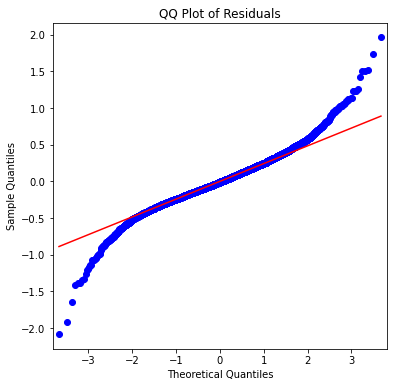

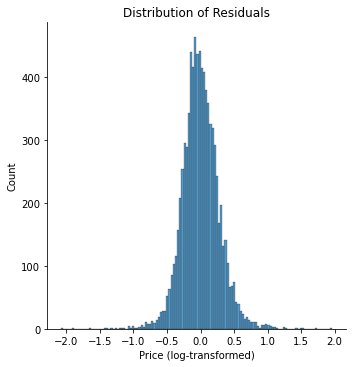

In [74]:
fig, ax = plt.subplots(figsize=(6, 6))
qqplot(np.array(residual), line='q', ax=ax)
plt.title('QQ Plot of Residuals')
plt.show()

sns.displot(residual)
plt.title("Distribution of Residuals")
plt.xlabel("Price (log-transformed)")
plt.show()

# Final Model
We will create results of our models into bar graphs for comparison.

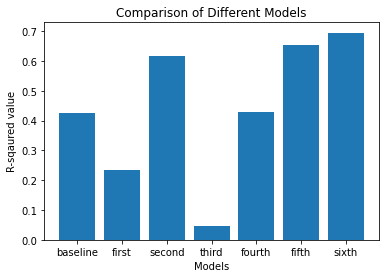

In [79]:
# Define the x-coordinates, heights and colors of the bars
x = ['baseline', 'first', 'second', 'third', 'fourth', 'fifth', 'sixth']
heights = [result[0] for result in results]

# Create an axis object and plot the bar chart
fig, ax = plt.subplots()
ax.bar(x, heights)

# Plot
ax.set_xlabel('Models')
ax.set_ylabel('R-sqaured value')
ax.set_title('Comparison of Different Models')
plt.show()


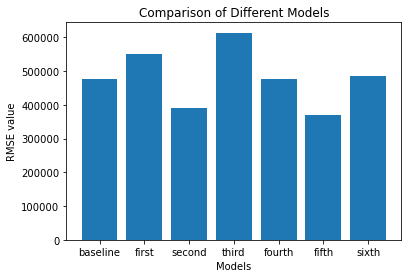

In [76]:
# Define the x-coordinates and heights of the bars
x = ['baseline', 'first', 'second', 'third', 'fourth', 'fifth', 'sixth']
heights = [result[1] for result in results]

# Create an axis object and plot the bar chart
fig, ax = plt.subplots()
ax.bar(x, heights)

# Plot
ax.set_xlabel('Models')
ax.set_ylabel('RMSE value')
ax.set_title('Comparison of Different Models')
plt.show()

The last two models are by far the best, I will choose the fifth as the final model. While slightly less impressive in accuracy of prediction, the fifth model compensates for it by providing way less errors associated with its prediction.

# Conclusion

We have developed a model for predicting housing prices in King County, and have seen a significant improvement in prediction accuracy from 42% to 70%. While this is a notable improvement, we acknowledge that the model can be further enhanced by incorporating additional datasets and introducing new predictor variables. With continued refinement, it is possible to achieve even higher levels of accuracy. I remain committed to this effort, and will provide updates on any further improvements that are made to the model.